In [ ]:
# In this notebook we will examine the pointing data used to build the pointing model on Apr Run. 

## Pointing accuracy

In [3]:
from lsst.pipe.tasks.quickFrameMeasurement import QuickFrameMeasurementTask
from lsst.summit.utils.bestEffort import BestEffortIsr
import lsst.daf.butler as dafButler

from lsst.geom import PointD
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

In [4]:
# Call butler
REPO_DIR = '/repo/LATISS'
butler = dafButler.Butler(REPO_DIR, instrument='LATISS', collections = 'LATISS/raw/all')

In [7]:
# BestEffort ISR
bestEffort = BestEffortIsr()

# Configure quickFrameMeasurement Task
qm_config = QuickFrameMeasurementTask.ConfigClass()
qm = QuickFrameMeasurementTask(config=qm_config)

# Using Centroid - boresight position. (Center of detector) 

In [9]:
def calculate_xy_offsets(exp):
    pixel_scale = 0.09569  # arcsec/pixel
    boresight_position = PointD(2036.5, 2000.5)

    """Returns x/y offset in arcseconds from an exp based on current centroid
    and desired position (which is the boresight position in pixels)"""

    #Measure Centroids
    result = qm.run(exp)
    centroids = PointD(result.brightestObjCentroid[0], result.brightestObjCentroid[1])


    dx_arcsec, dy_arcsec = pixel_scale * (
        centroids - boresight_position
    )

    dr_arcsec = np.sqrt(dx_arcsec**2 + dy_arcsec**2)

    return dx_arcsec, dy_arcsec, dr_arcsec

In [10]:
def get_azel(exp):
    info = exp.getInfo()
    vi = info.getVisitInfo()
    
    azAlt = vi.getBoresightAzAlt()
    az = azAlt[0].asDegrees()
    el = azAlt[1].asDegrees()
    
    return az, el

In [11]:
# PD with offsets

line= [] 

for exposure in np.arange(2022040700159,2022040700311,2):
    print(exposure) 
    
    data_id = {'instrument': 'LATISS', 'exposure': exposure, 'detector':0}

    exp = bestEffort.getExposure(data_id)
    
    dx, dy, dr = calculate_xy_offsets(exp)
    
    az, el = get_azel(exp)
    
    line.append(
        {'exposures': exposure,
         'azimuth': az,
         'elevation': el, 
         'dx_origin':dx,  
         'dy_origin': dy,
         'pointing_origin' : dr
        }
    )
    
df = pd.DataFrame(line)   

2022040700159


/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-3.0.0/Linux64/meas_algorithms/gf36ae6ace1+1d7ae49801/python/lsst/meas/algorithms/installGaussianPsf.py:77: FutureWarning: Default position argument overload is deprecated and will be removed in version 24.0.  Please explicitly specify a position.
  psfSigma = psfModel.computeShape().getDeterminantRadius()
/opt/lsst/software/stack/stack/miniconda3-py38_4.9.2-3.0.0/Linux64/meas_algorithms/gf36ae6ace1+1d7ae49801/python/lsst/meas/algorithms/installGaussianPsf.py:78: FutureWarning: Default position argument overload is deprecated and will be removed in version 24.0.  Please explicitly specify a position.
  width, height = psfModel.computeImage().getDimensions()


2022040700161


2022040700163


2022040700165


2022040700167


2022040700169


2022040700171


2022040700173


2022040700175


2022040700177


2022040700179


2022040700181


2022040700183


2022040700185


2022040700187


2022040700189


2022040700191


2022040700193


2022040700195


2022040700197


2022040700199


2022040700201


2022040700203


2022040700205


2022040700207


2022040700209


2022040700211


2022040700213


2022040700215


2022040700217


2022040700219


2022040700221


2022040700223


2022040700225


2022040700227


2022040700229


2022040700231


2022040700233


2022040700235


2022040700237


2022040700239


2022040700241


2022040700243


2022040700245


2022040700247


2022040700249


2022040700251


2022040700253


2022040700255


2022040700257


2022040700259


2022040700261


2022040700263


2022040700265


2022040700267


2022040700269


2022040700271


2022040700273


2022040700275


2022040700277


2022040700279


2022040700281


2022040700283


2022040700285


2022040700287


2022040700289


2022040700291


2022040700293


2022040700295


2022040700297


2022040700299


2022040700301


2022040700303


2022040700305


2022040700307


2022040700309


In [12]:
df

,exposures,azimuth,elevation,dx_origin,dy_origin,pointing_origin
0,2022040700159,10.686064,37.469516,-0.062070,2.718875,2.719583
1,2022040700161,15.346006,47.432072,1.301804,5.426677,5.580638
2,2022040700163,22.657208,63.482507,-6.963086,2.320961,7.339715
3,2022040700165,22.372730,35.901512,-2.744132,1.480498,3.118034
4,2022040700167,33.393925,42.806433,-1.546783,5.287340,5.508948
...,...,...,...,...,...,...
71,2022040700301,149.527837,50.081426,-0.105737,-1.246279,1.250756
72,2022040700303,149.592333,50.154497,-0.128707,-1.304603,1.310936
73,2022040700305,109.370980,30.289896,-6.145921,-9.102956,10.983449
74,2022040700307,73.026770,35.618834,-4.122596,1.645621,4.438903


In [13]:
df.to_csv('PointingApril.txt')

In [16]:
df = pd.read_csv('PointingApril.txt') 

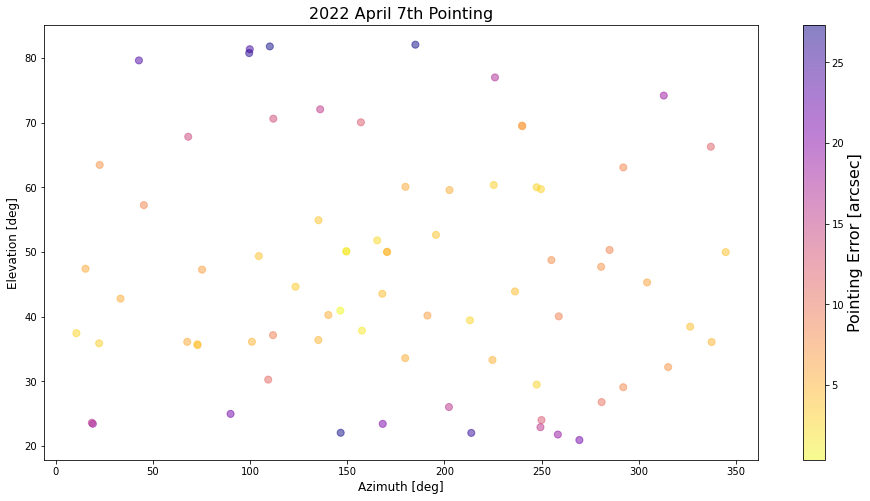

In [17]:
%matplotlib inline
fig = plt.figure(figsize=(16,8))
plt.scatter(df['azimuth'], df['elevation'], 
            s=50, alpha=0.5, c=df['pointing_origin'], label=f'Pointing Error', cmap='plasma_r')
plt.title('2022 April 7th Pointing', fontsize = 16)
plt.colorbar().set_label('Pointing Error [arcsec]',fontsize=16)
plt.ylabel('Elevation [deg]',fontsize=12)
plt.xlabel('Azimuth [deg]',fontsize=12)
plt.show()

In [18]:
np.sqrt(((df['pointing_origin']**2).sum())/len(df))

12.03291348811794

In [19]:
len(df)

(df[df['pointing_origin']>10]) 

,Unnamed: 0,exposures,azimuth,elevation,dx_origin,dy_origin,pointing_origin
5,5,2022040700169,42.837597,79.642034,-23.881259,2.534279,24.015351
7,7,2022040700173,68.216398,67.838822,-13.664853,3.173064,14.028419
10,10,2022040700179,90.000282,24.990776,-11.180820,-18.477005,21.596538
14,14,2022040700187,112.002506,70.632324,-13.462798,-2.369509,13.669730
18,18,2022040700195,136.106829,72.081512,-14.408257,-5.594122,15.456134
19,19,2022040700197,146.653490,22.075075,-11.545269,-24.770832,27.329240
21,21,2022040700201,157.056037,70.074182,-11.512017,-4.325588,12.297855
24,24,2022040700207,168.296290,23.449488,-10.066849,-18.106955,20.717222
29,29,2022040700217,202.360473,26.051482,-9.362245,-12.907591,15.945456
31,31,2022040700221,213.846699,22.052111,-12.152044,-22.662468,25.714969


***

In [21]:
# Calculate pointing accuracy RMS. 
rms = np.sqrt(((df['pointing_origin']**2).sum())/len(df))
print(f'The pointing accuracy RMS  is {rms:0.2f} arcsec')

The pointing accuracy RMS  is 12.03 arcsec
